# Pollution Rates in Glasgow's City Centre in 2020

In [8]:
"""
        Importing Packages and Libraries

""" 

import numpy as np # Import the numpy package for working with arrays
import pandas as pd # Import the pandas package for working with dataframes
import matplotlib.pyplot as plt # Import the matplotlib package for any relevant plots we wish to visualise
import seaborn as sns # Import the seaborn package for data visualisation

In [9]:
"""
        Importing Air Pollution Dataset

"""

pollution = pd.read_csv("AirQualityDataHourly.csv") # Importing the dataset

In [10]:
pollution.shape # Determining the size of the dataframe we are working with

(3728, 26)

In [11]:
pollution.head(5) # Taking a glimpse at the first 5 rows of data in our dataframe

,Date,Time,Nitric oxide,Status,Nitrogen dioxide,Status.1,Nitrogen oxides as nitrogen dioxide,Status.2,PM10 particulate matter (Hourly measured),Status.3,...,Non-volatile PM2.5 (Hourly measured),Status.7,Volatile PM2.5 (Hourly measured),Status.8,Modelled Wind Direction,Status.9,Modelled Wind Speed,Status.10,Modelled Temperature,Status.11
0,01/01/2020,01:00:00,133.9955,P ugm-3,69.24236,P ugm-3,274.69926,P ugm-3,19.575,P ugm-3 (FIDAS),...,No data,NaN,No data,NaN,204.6,N deg,1.5,N ms-1,3.1,N degC
1,01/01/2020,02:00:00,109.16566,P ugm-3,62.41148,P ugm-3,229.79649,P ugm-3,26.475,P ugm-3 (FIDAS),...,No data,NaN,No data,NaN,187.9,N deg,2,N ms-1,3.5,N degC
2,01/01/2020,03:00:00,87.6215,P ugm-3,63.00646,P ugm-3,197.35755,P ugm-3,22.05,P ugm-3 (FIDAS),...,No data,NaN,No data,NaN,209.7,N deg,3,N ms-1,4.5,N degC
3,01/01/2020,04:00:00,85.59872,P ugm-3,65.06798,P ugm-3,196.31752,P ugm-3,16.8,N ugm-3 (FIDAS),...,No data,NaN,No data,NaN,219.4,N deg,3.2,N ms-1,5.2,N degC
4,01/01/2020,05:00:00,71.15032,P ugm-3,64.14318,P ugm-3,173.23882,P ugm-3,16.375,P ugm-3 (FIDAS),...,No data,NaN,No data,NaN,222.7,N deg,3.9,N ms-1,5.7,N degC


In [12]:
pollution = pollution.set_index('Date') # Setting the "Date" column as the dataframe's index 

In [13]:
pollution.head()

,Time,Nitric oxide,Status,Nitrogen dioxide,Status.1,Nitrogen oxides as nitrogen dioxide,Status.2,PM10 particulate matter (Hourly measured),Status.3,Non-volatile PM10 (Hourly measured),...,Non-volatile PM2.5 (Hourly measured),Status.7,Volatile PM2.5 (Hourly measured),Status.8,Modelled Wind Direction,Status.9,Modelled Wind Speed,Status.10,Modelled Temperature,Status.11
Date,,,,,,,,,,,,,,,,,,,,,
01/01/2020,01:00:00,133.9955,P ugm-3,69.24236,P ugm-3,274.69926,P ugm-3,19.575,P ugm-3 (FIDAS),No data,...,No data,NaN,No data,NaN,204.6,N deg,1.5,N ms-1,3.1,N degC
01/01/2020,02:00:00,109.16566,P ugm-3,62.41148,P ugm-3,229.79649,P ugm-3,26.475,P ugm-3 (FIDAS),No data,...,No data,NaN,No data,NaN,187.9,N deg,2,N ms-1,3.5,N degC
01/01/2020,03:00:00,87.6215,P ugm-3,63.00646,P ugm-3,197.35755,P ugm-3,22.05,P ugm-3 (FIDAS),No data,...,No data,NaN,No data,NaN,209.7,N deg,3,N ms-1,4.5,N degC
01/01/2020,04:00:00,85.59872,P ugm-3,65.06798,P ugm-3,196.31752,P ugm-3,16.8,N ugm-3 (FIDAS),No data,...,No data,NaN,No data,NaN,219.4,N deg,3.2,N ms-1,5.2,N degC
01/01/2020,05:00:00,71.15032,P ugm-3,64.14318,P ugm-3,173.23882,P ugm-3,16.375,P ugm-3 (FIDAS),No data,...,No data,NaN,No data,NaN,222.7,N deg,3.9,N ms-1,5.7,N degC


Below we are reducing the dataset down to the columns we are interested in exploring:

In [14]:
pollution = pollution[["Time", "Nitric oxide", "Nitrogen dioxide"]]

In [15]:
pollution.head()

,Time,Nitric oxide,Nitrogen dioxide
Date,,,
01/01/2020,01:00:00,133.9955,69.24236
01/01/2020,02:00:00,109.16566,62.41148
01/01/2020,03:00:00,87.6215,63.00646
01/01/2020,04:00:00,85.59872,65.06798
01/01/2020,05:00:00,71.15032,64.14318


It is an important step in the data preparation process that null/NaN values are removed from the dataset. However, as all the data is key for our analysis, we decided to replace these null values with median values.

In [16]:
pollution['Nitric oxide'].fillna(pollution.median(), inplace=True)
pollution['Nitrogen dioxide'].fillna(pollution.median(), inplace=True)

In [17]:
pollution.isnull().any() # Allows us to check what columns have null values (if any)

Time                True
Nitric oxide        True
Nitrogen dioxide    True
dtype: bool

We found out that all of the data was imported as an "object" rather than a "float". This was determined by the information below. We then converted the "Nitric oxide" and "Nitrogen dioxide" columns to floats so they could be worked with in our analysis,

In [18]:
pollution.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3728 entries, 01/01/2020 to End
Data columns (total 3 columns):
Time                3720 non-null object
Nitric oxide        3720 non-null object
Nitrogen dioxide    3720 non-null object
dtypes: object(3)
memory usage: 116.5+ KB


In [19]:
pollution = pollution.convert_objects(convert_numeric=True)
pollution.dtypes

C:\Users\Stewart\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


Time                 object
Nitric oxide        float64
Nitrogen dioxide    float64
dtype: object

The air pollution dataset was initially timestamped in hours. However, we felt by taking a peak hour in the day for air pollution (8am), we could use this data to analyse the pollution rates effectively. 

In [20]:
pollution = pollution[pollution["Time"] == "08:00:00"] 
pollution.describe()

,Nitric oxide,Nitrogen dioxide
count,154.000000,154.000000
mean,11.481979,26.120872
std,13.829883,19.519971
min,0.623650,0.382500
25%,3.029525,11.300487
50%,6.092950,19.688410
75%,15.141307,38.360045
max,76.798800,79.731170


In [21]:
pollution.head()

,Time,Nitric oxide,Nitrogen dioxide
Date,,,
01/01/2020,08:00:00,32.04333,53.83027
02/01/2020,08:00:00,1.44604,5.60838
03/01/2020,08:00:00,10.58087,44.45435
04/01/2020,08:00:00,4.21653,15.97509
05/01/2020,08:00:00,2.77039,8.23651


In [22]:
pollution.index

Index(['01/01/2020', '02/01/2020', '03/01/2020', '04/01/2020', '05/01/2020',
       '06/01/2020', '07/01/2020', '08/01/2020', '09/01/2020', '10/01/2020',
       ...
       '25/05/2020', '26/05/2020', '27/05/2020', '28/05/2020', '29/05/2020',
       '30/05/2020', '31/05/2020', '01/06/2020', '02/06/2020', '03/06/2020'],
      dtype='object', name='Date', length=155)

The next 6 lines of code represent the calculations we made on the percentage change of both "Nitric oxide" and "Nitrogen dioxide" before and after lockdown was inititated in the UK, respectively. 

**NB**: The index "83" used here is the equivalent of the 23rd of March 2020 which is the day lockdown was initiated in the UK

In [23]:
before_no = pollution["Nitric oxide"][:83].mean()
before_no

15.454096707317065

In [24]:
after_no = pollution["Nitric oxide"][83:].mean()
after_no

6.95817722222222

In [25]:
((before_no - after_no) / before_no)*100

54.975192960144184

In [26]:
before_nd = pollution["Nitrogen dioxide"][:83].mean()
before_nd

33.44459280487805

In [27]:
after_nd = pollution["Nitrogen dioxide"][83:].mean()
after_nd

17.779967916666667

In [28]:
((before_nd - after_nd) / before_nd)*100

46.83754106262171

The results of the calculations for percentage changes in air pollution were as follows:

1. Nitric oxide = 54.975% reduction
2. Nitrogen dioxide = 46.838% reduction

The plot below is a clear indication that since lockdown was initiated in the UK on the 23rd of March 2020, air pollution levels in both Nitric oxide and Nitrogen dioxide have dropped by a substantial amount. This is likely to be caused by many people now being forced to work from their homes and this results in less transport activity across Glasgow. Therefore, if companies could continue implementing teleworking as much as possible once lockdown restrictions are eased, this could have a monumental impact on the environment going forward in the future.

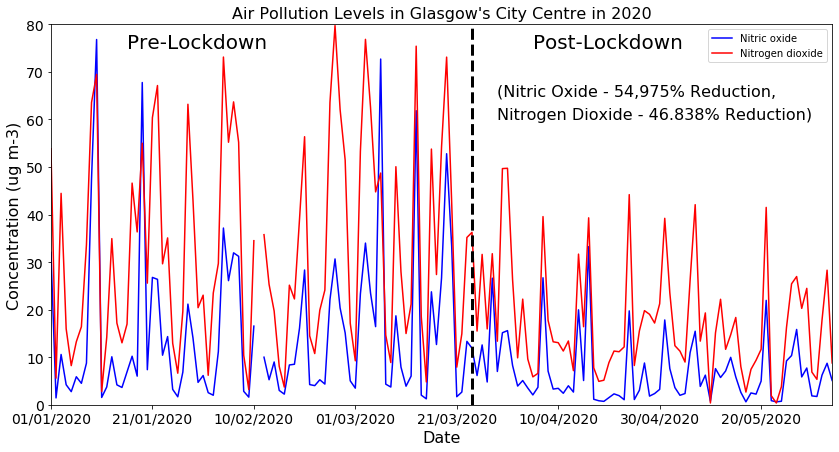

In [31]:
pollution.plot(figsize=(14, 7), color=['b', 'r'], fontsize=14)

import datetime as dt
plt.title("Air Pollution Levels in Glasgow's City Centre in 2020", fontsize=16)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Concentration (ug m-3)', fontsize=16)
plt.axvline(x=83,color='k',linestyle='--', linewidth=3) # Dashed horizontal line splits time period of pre- and post-lockdown
plt.ylim(0,80)
plt.text(15, 75, "Pre-Lockdown", fontsize=20)
plt.text(95, 75, "Post-Lockdown", fontsize=20)
plt.text(88, 65, "(Nitric Oxide - 54,975% Reduction,", fontsize=16)
plt.text(88, 60, "Nitrogen Dioxide - 46.838% Reduction)", fontsize=16)
plt.legend()
plt.show()
